In [1]:
import pickle
import numpy as np
import pandas as pd

from collections import Counter
from autoplotter import run_app

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\gerardo\.virtualenvs\datascience\lib\site-packages\dash_bootstrap_components\_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
c:\users\gerardo\.virtualenvs\datascience\lib\site-packages\autoplotter\app.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
c:\users\gerardo\.virtualenvs\datascience\lib\site-packages\autoplotter\homepage.py:1: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


In [2]:
data = pd.read_csv("./data/clean_data.csv")

In [80]:
data.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [81]:
data.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_8,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
run_app(data, mode='external')

c:\users\gerardo\.virtualenvs\datascience\lib\site-packages\autoplotter\jupyter_dash\jupyter_app.py:118: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



AutoPlotter is running on http://127.0.0.1:8050/


#### Feature selection

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'limit_bal', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month', 'female', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'marriage_1', 'marriage_2', 'marriage_3', 'pay_1_-1', 'pay_1_0',
       'pay_1_1', 'pay_1_2', 'pay_1_3', 'pay_1_4', 'pay_1_5', 'pay_1_6',
       'pay_1_7', 'pay_1_8', 'pay_2_-1', 'pay_2_0', 'pay_2_1', 'pay_2_2',
       'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_2_7', 'pay_2_8',
       'pay_3_-1', 'pay_3_0', 'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_4',
       'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_-1', 'pay_4_0',
       'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6',
       'pay_4_7', 'pay_4_8', 'pay_5_-1', 'pay_5_0', 'pay_5_2', 'pay_5_3',
       'pay_5_4', 'pay_5_5', 'pay_5_6', 'pay_5_7', 'pay_5_

In [65]:
important_columns = ['pay_amt4', 'pay_amt5', 'pay_1_2', 'pay_1_3', 'pay_1_4','pay_2_2', 'pay_2_3', 'pay_3_3', 'pay_3_4', 'pay_3_7', 'pay_4_3','pay_4_4', 'pay_4_7', 'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_7','pay_6_3', 'pay_6_4', 'pay_6_7', 'age']

In [66]:
output = 'default_payment_next_month'

cols = [f for f in data.columns if data.dtypes[ f ] != "object"]
cols = [f for f in cols if f in important_columns]
cols

['age',
 'pay_amt4',
 'pay_amt5',
 'pay_1_2',
 'pay_1_3',
 'pay_1_4',
 'pay_2_2',
 'pay_2_3',
 'pay_3_3',
 'pay_3_4',
 'pay_3_7',
 'pay_4_3',
 'pay_4_4',
 'pay_4_7',
 'pay_5_2',
 'pay_5_3',
 'pay_5_4',
 'pay_5_7',
 'pay_6_3',
 'pay_6_4',
 'pay_6_7']

In [67]:
features = cols

In [68]:
data.groupby(['default_payment_next_month']).size()

default_payment_next_month
0    23364
1     6636
dtype: int64

Identificamos que el dataset se encuentra desbalanceado, con una proporción alrededor de 80:20 en cuanto a 0s y 1s en la columna default_payment_next_month

##### Data scaling

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

In [70]:
X = data[features].values    
y = data[output].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scX = StandardScaler()
X_train = scX.fit_transform(X_train)
X_test = scX.transform(X_test)

In [71]:
over_sampler = RandomOverSampler(random_state=42)
X_osample, y_osample = over_sampler.fit_resample(X_train, y_train)

In [72]:
print(f"Training target statistics: {Counter(y_osample)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 18681, 1: 18681})
Testing target statistics: Counter({0: 4683, 1: 1317})


In [31]:
with open('./models/x_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
    
with open('./models/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

##### Imports for evaluation

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, precision_recall_curve
from scikitplot.metrics import plot_roc

### Logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

log_model = LogisticRegression(solver='liblinear', C=10)
log_model.fit(X_osample, y_osample)

log_preds = log_model.predict(X_test)

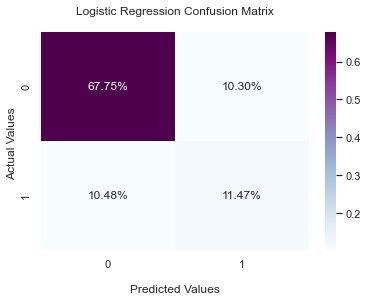

In [75]:
log_cm = confusion_matrix(y_test, log_preds)

ax = sns.heatmap(log_cm/np.sum(log_cm), annot=True, fmt='0.2%', cmap='BuPu')

ax.set_title('Logistic Regression Confusion Matrix\n');

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [76]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4683
           1       0.53      0.52      0.52      1317

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000



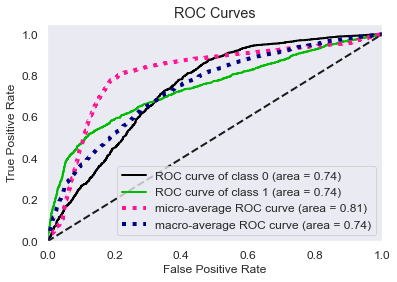

In [77]:
plot_roc(y_test, log_model.predict_proba(X_test))
plt.show()

In [78]:
log_precision, log_recall, _ = precision_recall_curve(y_test, log_model.predict_proba(X_test)[:, 1])

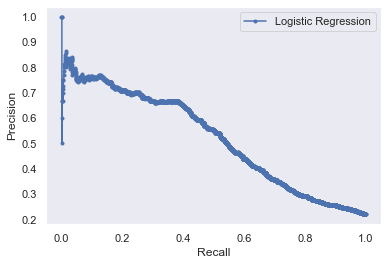

In [79]:
plt.plot(log_recall, log_precision, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [32]:
with open('./models/log.pkl', 'wb') as f:
    pickle.dump(log_model, f)
    
with open('./models/log_cm.pkl', 'wb') as f:
    pickle.dump(log_cm, f)

### SVM Model

In [58]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

svm_model = svm.SVC(
    probability=True,
    kernel="rbf"
)
svm_model.fit(X_osample, y_osample)
svm_preds = svm_model.predict(X_test)

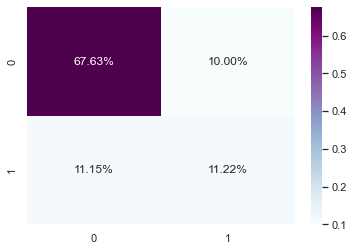

In [59]:
svm_cm = confusion_matrix(y_test, svm_preds)

sns.heatmap(svm_cm/np.sum(svm_cm), annot=True, fmt='0.2%', cmap='BuPu')

ax.set_title('SVM Confusion Matrix\n');

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [60]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4658
           1       0.53      0.50      0.51      1342

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.78      0.79      0.79      6000



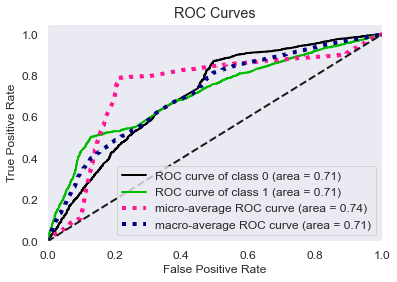

In [61]:
plot_roc(y_test, svm_model.predict_proba(X_test))
plt.show()

In [62]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

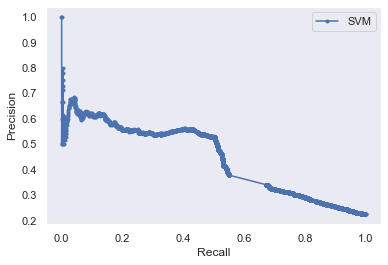

In [63]:
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [64]:
with open('./models/svm.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
    
with open('./models/svm_cm.pkl', 'wb') as f:
    pickle.dump(svm_cm, f)

### Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_osample, y_osample)

rf_preds = rf_model.predict(X_test)

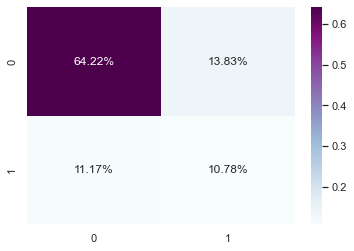

In [85]:
rf_cm = confusion_matrix(y_test, rf_preds)

sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, fmt='0.2%', cmap='BuPu')

ax.set_title('Random Forest Confusion Matrix\n');

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [86]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4683
           1       0.44      0.49      0.46      1317

    accuracy                           0.75      6000
   macro avg       0.64      0.66      0.65      6000
weighted avg       0.76      0.75      0.75      6000



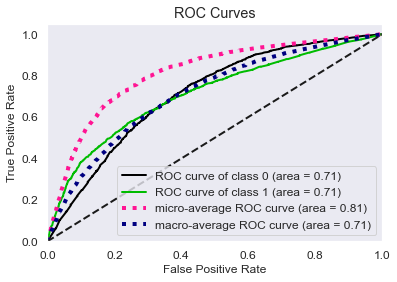

In [87]:
plot_roc(y_test, rf_model.predict_proba(X_test))
plt.show()

In [88]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

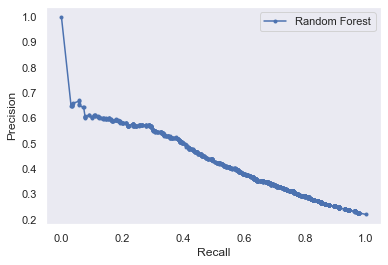

In [89]:
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### XGBoost

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [34]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dosample = xgb.DMatrix(X_osample, label=y_osample)

#### Optimización de hiperparámetros

In [35]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
    'eval_metric':'auc'
}

num_boost_round = 999

In [101]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [102]:
max_auc = float(0)
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgb.cv(
        params,
        dosample,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=10
    )
    
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth,min_child_weight)
    
print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

CV with max_depth=9, min_child_weight=5
	AUC 0.9635672 for 786 rounds
CV with max_depth=9, min_child_weight=6
	AUC 0.963214 for 905 rounds
CV with max_depth=9, min_child_weight=7
	AUC 0.9626250000000001 for 893 rounds
CV with max_depth=10, min_child_weight=5
	AUC 0.9648884000000001 for 687 rounds
CV with max_depth=10, min_child_weight=6
	AUC 0.9624068000000001 for 530 rounds
CV with max_depth=10, min_child_weight=7
	AUC 0.9636588000000001 for 996 rounds
CV with max_depth=11, min_child_weight=5
	AUC 0.9652711999999999 for 594 rounds
CV with max_depth=11, min_child_weight=6
	AUC 0.9638388000000001 for 528 rounds
CV with max_depth=11, min_child_weight=7
	AUC 0.964434 for 865 rounds
Best params: 11, 5, AUC: 0.9652711999999999


In [36]:
#actualizamos parámetros
params['max_depth'] = 11
params['min_child_weight'] = 5

In [113]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [114]:
max_auc = float(0)
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample, colsample))
    
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=10
    )
    
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)

print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

CV with subsample=1.0, colsample=1.0
	AUC 0.7745536000000001 for 66 rounds
CV with subsample=1.0, colsample=0.9
	AUC 0.7740854 for 73 rounds
CV with subsample=1.0, colsample=0.8
	AUC 0.7724092 for 31 rounds
CV with subsample=1.0, colsample=0.7
	AUC 0.7750418000000001 for 74 rounds
CV with subsample=0.9, colsample=1.0
	AUC 0.7734806 for 58 rounds
CV with subsample=0.9, colsample=0.9
	AUC 0.7751036 for 70 rounds
CV with subsample=0.9, colsample=0.8
	AUC 0.7746894000000001 for 48 rounds
CV with subsample=0.9, colsample=0.7
	AUC 0.7758394 for 71 rounds
CV with subsample=0.8, colsample=1.0
	AUC 0.7736294000000001 for 61 rounds
CV with subsample=0.8, colsample=0.9
	AUC 0.7744826 for 62 rounds
CV with subsample=0.8, colsample=0.8
	AUC 0.7741372 for 69 rounds
CV with subsample=0.8, colsample=0.7
	AUC 0.7748345999999999 for 60 rounds
CV with subsample=0.7, colsample=1.0
	AUC 0.7744346 for 58 rounds
CV with subsample=0.7, colsample=0.9
	AUC 0.7737102 for 70 rounds
CV with subsample=0.7, colsampl

In [37]:
# actualizamos parámetros
params['subsample'] = 0.9
params['colsample_bytree'] = 0.7

In [116]:
%time

max_auc = float(0)
best_params = None

for eta in [0.05, 0.1, 0.2, 0.3]:
    print("CV with eta={}".format(eta))
    
    params['eta'] = eta
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['auc'],early_stopping_rounds=10)
    
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_param = eta

print("Best param: {}, AUC: {}".format(best_param, max_auc))

Wall time: 0 ns
CV with eta=0.05
Wall time: 11.9 s
	AUC 0.7758394 for 71 rounds
CV with eta=0.1
Wall time: 8.04 s
	AUC 0.7735169999999999 for 41 rounds
CV with eta=0.2
Wall time: 5.35 s
	AUC 0.7682420000000001 for 20 rounds
CV with eta=0.3
Wall time: 3.65 s
	AUC 0.7640364 for 8 rounds
Best param: 0.05, AUC: 0.7758394


In [38]:
params['eta'] = 0.05

In [39]:
params

{'max_depth': 11,
 'min_child_weight': 5,
 'eta': 0.05,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'objective': 'binary:logistic',
 'eval_metric': 'auc'}

#### Training y testing

In [40]:
xgb_model = xgb.train(
    params,
    dosample,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

xgb_preds = xgb_model.predict(dtest)

binary_preds = [0 if x < 0.5 else 1 for x in xgb_preds]

[0]	Test-auc:0.70528
[1]	Test-auc:0.73007
[2]	Test-auc:0.72489
[3]	Test-auc:0.72951
[4]	Test-auc:0.73381
[5]	Test-auc:0.73984
[6]	Test-auc:0.73999
[7]	Test-auc:0.74086
[8]	Test-auc:0.74271
[9]	Test-auc:0.74355
[10]	Test-auc:0.74411
[11]	Test-auc:0.74392
[12]	Test-auc:0.74488
[13]	Test-auc:0.74517
[14]	Test-auc:0.74435
[15]	Test-auc:0.74422
[16]	Test-auc:0.74357
[17]	Test-auc:0.74405
[18]	Test-auc:0.74424
[19]	Test-auc:0.74476
[20]	Test-auc:0.74517
[21]	Test-auc:0.74541
[22]	Test-auc:0.74534
[23]	Test-auc:0.74551
[24]	Test-auc:0.74493
[25]	Test-auc:0.74441
[26]	Test-auc:0.74422
[27]	Test-auc:0.74453
[28]	Test-auc:0.74435
[29]	Test-auc:0.74446
[30]	Test-auc:0.74445
[31]	Test-auc:0.74431
[32]	Test-auc:0.74436


#### Evaluación

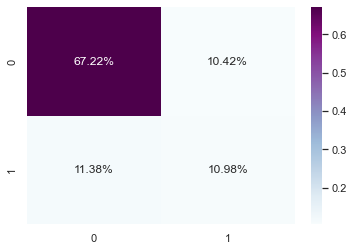

In [41]:
xgb_cm = confusion_matrix(y_test, binary_preds)

sns.heatmap(xgb_cm/np.sum(xgb_cm), annot=True, fmt='0.2%', cmap='BuPu')

ax.set_title('XG Boost Confusion Matrix\n');

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [42]:
print(classification_report(y_test, binary_preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4658
           1       0.51      0.49      0.50      1342

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



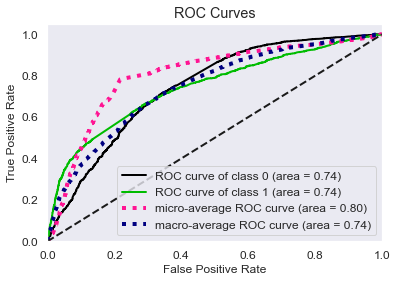

In [43]:
plot_roc(y_test, [[1.0 - f, f] for f in xgb_preds])
plt.show()

In [44]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_preds)

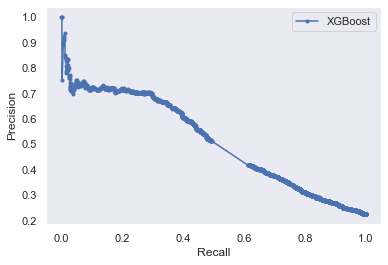

In [45]:
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [57]:
xgb.set_config(verbosity=0)

xg_reg = xgb.XGBRegressor(
    objective ='reg:logistic', 
    colsample_bytree = params['colsample_bytree'], 
    learning_rate = params['eta'],
    max_depth = params['max_depth'], 
    min_child_weight = params['min_child_weight'],
    subsample = params['subsample'],
    num_boost_round=num_boost_round,
)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=11, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_boost_round=999, num_parallel_tree=1, objective='reg:logistic',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
with open('./models/xgb.pkl', 'wb') as f:
    pickle.dump(xg_reg, f)
    
with open('./models/xgb_cm.pkl', 'wb') as f:
    pickle.dump(xgb_cm, f)

### Visualización de resultados

In [90]:
cms = {
    'LR': log_cm,
    'SVM': svm_cm,
    'RF': rf_cm,
    'XGB': xgb_cm
}
models = [key for key in cms.keys()]

pres_rec = pd.DataFrame(columns=('model', 'precision', 'recall', 'class'))

j = 4
for i in range(len(models)):
    cm = cms[models[i]]
    pres_rec.loc[i] = [
        models[i], 
        cm[0][0]/(cm[0][0]+cm[1][0]), 
        cm[0][0]/(cm[0][0]+cm[0][1]),
        0
    ]
    pres_rec.loc[j] = [
        models[i],
        cm[1][1]/(cm[1][1]+cm[0][1]),
        cm[1][1]/(cm[1][1]+cm[1][0]),
        1
    ]
    j += 1

In [91]:
pres_rec

,model,precision,recall,class
0,LR,0.865999,0.868033,0
4,LR,0.526799,0.522399,1
1,SVM,0.858473,0.871189,0
5,SVM,0.528672,0.501490,1
2,RF,0.851868,0.822763,0
6,RF,0.438050,0.491268,1
3,XGB,0.855174,0.865822,0
7,XGB,0.513240,0.491058,1


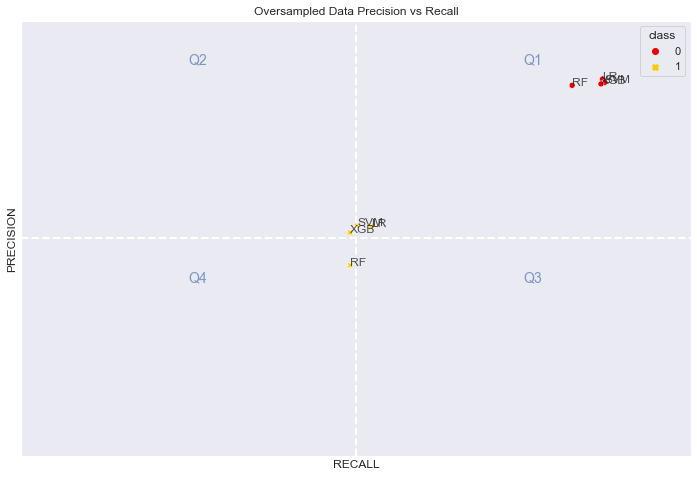

In [92]:
plt.figure(figsize=(12,8))

sns.set(style='dark')
sns.scatterplot(data=pres_rec, x='recall', y='precision', hue='class', style='class',palette='hot')

plt.title(f"Oversampled Data Precision vs Recall")

plt.xlabel('RECALL')
plt.ylabel('PRECISION')
          
for i in range(pres_rec.shape[0]):
    plt.text(pres_rec.recall[i], y=pres_rec.precision[i], s=pres_rec.model[i], alpha=0.8)

plt.axhline(y=0.5, color='white', linestyle='--', linewidth=2)
plt.axvline(x=0.5, color='white',linestyle='--', linewidth=2)

plt.text(x=0.75, y=0.9, s="Q1",alpha=0.7,fontsize=14, color='b')
plt.text(x=0.25, y=0.9, s="Q2",alpha=0.7,fontsize=14, color='b')
plt.text(x=0.75, y=0.4, s="Q3", alpha=0.7,fontsize=14, color='b')
plt.text(x=0.25, y=0.4, s="Q4", alpha=0.7,fontsize=14, color='b')

plt.xticks(np.arange(0, 1.25, 0.25))
plt.yticks(np.arange(0, 1.25, 0.25))

plt.gca().axes.yaxis.set_ticks([])
plt.gca().axes.xaxis.set_ticks([])

plt.show()

La gráfica muestra el balance entre la precision y recall de cada modelo, para cada una de las clases (0: no cae en default, 1: sí cae).

* El Q1, se refiere a los modelos con mejor funcionamiento en su respectiva clase.
* Q2 significa que el modelo no detecta muy bien la clase, pero cuando lo hace es confiable.
* Q3, la clase se detecta bien, pero incluye también datos pertenecientes a la otra clase
* Q4, la clase no se maneja correctamente